In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\UMAR DATA\\Data Sciences\\math and statistics\\statistics testing\\ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


# Data Understanding

In [3]:
df.shape

(294478, 5)

In [4]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [7]:
df.describe(include='object')

,timestamp,group,landing_page
count,294478,294478,294478
unique,294478,2,2
top,2017-01-21 22:11:48.556739,treatment,old_page
freq,1,147276,147239


In [8]:
print("\nGroup distribution:")
print(df['group'].value_counts(normalize=True))

print("\nLanding page distribution:")
print(df['landing_page'].value_counts(normalize=True))

print("\nGroup/page mismatches:")
print(pd.crosstab(df['group'], df['landing_page']))


Group distribution:
group
treatment    0.500126
control      0.499874
Name: proportion, dtype: float64

Landing page distribution:
landing_page
old_page    0.5
new_page    0.5
Name: proportion, dtype: float64

Group/page mismatches:
landing_page  new_page  old_page
group                           
control           1928    145274
treatment       145311      1965


#  Data Cleaning

In [9]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df=df.drop(['user_id'],axis='columns')
df.head()

,timestamp,group,landing_page,converted
0,2017-01-21 22:11:48.556739,control,old_page,0
1,2017-01-12 08:01:45.159739,control,old_page,0
2,2017-01-11 16:55:06.154213,treatment,new_page,0
3,2017-01-08 18:28:03.143765,treatment,new_page,0
4,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
df_control=df[df['group']=='control']
df_control.head()

,timestamp,group,landing_page,converted
0,2017-01-21 22:11:48.556739,control,old_page,0
1,2017-01-12 08:01:45.159739,control,old_page,0
4,2017-01-21 01:52:26.210827,control,old_page,1
5,2017-01-10 15:20:49.083499,control,old_page,0
7,2017-01-17 01:48:29.539573,control,old_page,0


In [11]:
df_control=df_control[df_control['landing_page']=='old_page']
df_control.head()

,timestamp,group,landing_page,converted
0,2017-01-21 22:11:48.556739,control,old_page,0
1,2017-01-12 08:01:45.159739,control,old_page,0
4,2017-01-21 01:52:26.210827,control,old_page,1
5,2017-01-10 15:20:49.083499,control,old_page,0
7,2017-01-17 01:48:29.539573,control,old_page,0


C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_3172\3324335064.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.countplot(data=df_control,x='converted',palette='Set2')


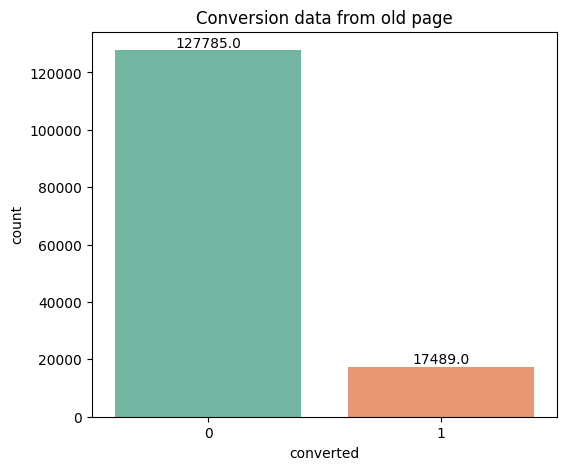

In [12]:
import seaborn as sns
plt.figure(figsize=(6,5))
plot=sns.countplot(data=df_control,x='converted',palette='Set2')
plt.title('Conversion data from old page')
for p in plot.patches:
    count=str(p.get_height())
    plot.annotate(count,(p.get_x()+p.get_width()/2,p.get_height()+5),ha='center',va='bottom')

In [13]:
df_treat=df[df['group']=='treatment']
df_treat=df_treat[df_treat['landing_page']=='new_page']
df_treat.head()

,timestamp,group,landing_page,converted
2,2017-01-11 16:55:06.154213,treatment,new_page,0
3,2017-01-08 18:28:03.143765,treatment,new_page,0
6,2017-01-19 03:26:46.940749,treatment,new_page,1
8,2017-01-04 17:58:08.979471,treatment,new_page,1
9,2017-01-15 18:11:06.610965,treatment,new_page,1


C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_3172\1283833258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.countplot(data=df_treat,x='converted',palette='Set2')


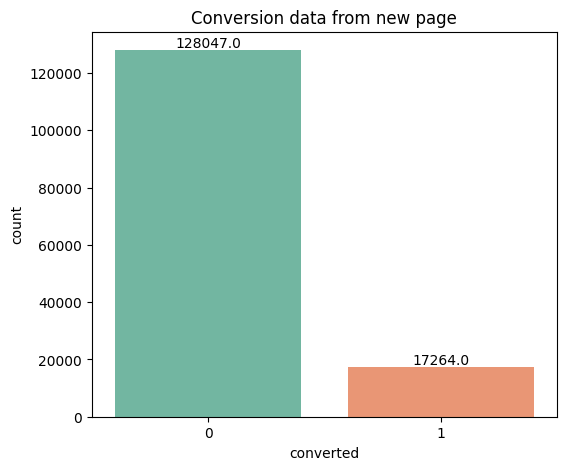

In [14]:
plt.figure(figsize=(6,5))
plot=sns.countplot(data=df_treat,x='converted',palette='Set2')
plt.title('Conversion data from new page')
for p in plot.patches:
    count=str(p.get_height())
    plot.annotate(count,(p.get_x()+p.get_width()/2,p.get_height()+5),ha='center',va='bottom')

In [15]:
df_cleaned = pd.concat([df_control, df_treat], axis=0)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.head()

,timestamp,group,landing_page,converted
0,2017-01-21 22:11:48.556739,control,old_page,0
1,2017-01-12 08:01:45.159739,control,old_page,0
2,2017-01-21 01:52:26.210827,control,old_page,1
3,2017-01-10 15:20:49.083499,control,old_page,0
4,2017-01-17 01:48:29.539573,control,old_page,0


<Figure size 1200x600 with 0 Axes>

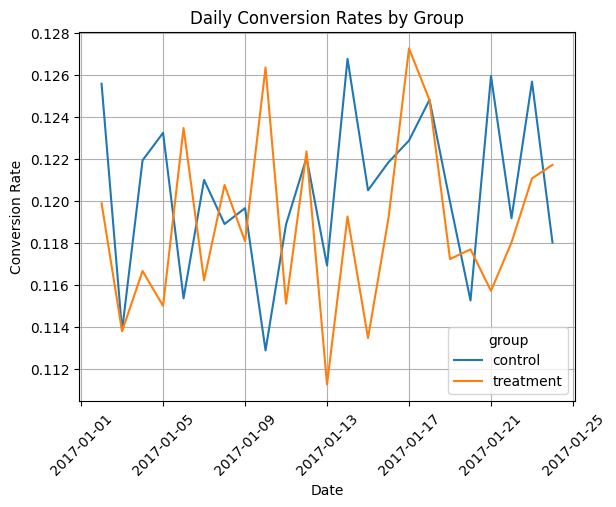

In [16]:
# Time-based analysis
df_cleaned['date'] = df_cleaned['timestamp'].dt.date
daily_conversion = df_cleaned.groupby(['date', 'group'])['converted'].mean().unstack()

plt.figure(figsize=(12,6))
daily_conversion.plot()
plt.title('Daily Conversion Rates by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)

In [17]:
conv_group=df_cleaned[(df_cleaned['landing_page']=='old_page') & (df_cleaned['converted']==1)]
conv_treat=df_cleaned[(df_cleaned['landing_page']=='new_page') & (df_cleaned['converted']==1)]

# Conversion Rate Calculation

In [18]:
converion_rate_from_control_group=len(conv_group)/len(df_control)
print(f"Conversion Rate (Control - old page): {np.round(converion_rate_from_control_group,4)}")
converion_rate_from_treat_group=len(conv_treat)/len(df_treat)
print(f"Conversion Rate (Treatment - new page): {np.round(converion_rate_from_treat_group,4)}")

NameError: name 'np' is not defined

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=['Control (Old Page)', 'Treatment (New Page)'],
            y=[converion_rate_from_control_group, converion_rate_from_treat_group],
            palette='Set2')
plt.ylabel("Conversion Rate")
plt.title("Comparison of Conversion Rates")
plt.ylim(0, max(converion_rate_from_control_group, converion_rate_from_treat_group) + 0.02)
plt.show()


# A/B Testing: Z-Test for Proportions

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
convert_control = df_control['converted'].sum()
convert_treatment = df_treat['converted'].sum()

n_control = len(df_control)
n_treatment = len(df_treat)

counts = [convert_control, convert_treatment]
nobs = [n_control, n_treatment]

z_stat, p_value = proportions_ztest(count=counts, nobs=nobs, alternative='two-sided')

print(f"Z-statistic: {z_stat:.5}")
print(f"P-value: {p_value:.5f}")

### Since p-value > 0.05, we fail to reject the null hypothesis. 
### There is no statistically significant evidence that the new landing page increases conversion rates.

In [ ]:
from statsmodels.stats.proportion import proportion_confint

control_lower,control_upper=proportion_confint(convert_control,n_control,method='wilson')
treatment_lower, treatment_upper = proportion_confint(convert_treatment, n_treatment, method='wilson')

print("Control Group Conversion Rate 95% CI:")
print(f"[{control_lower:.4f}, {control_upper:.4f}]")

print("\nTreatment Group Conversion Rate 95% CI:")
print(f"[{treatment_lower:.4f}, {treatment_upper:.4f}]")


### The intervals overlap substantially, suggesting no statistically significant difference